# Aproximación cuadrática
#### https://meet.noysi.com/metodosnumericos1

Vamos a aproximar la función $f=1/(1+x^2)$ en el intervalo $[0,3]$ mediante polinomios de grado menor o igual a 4 en el espacio de las funciones continuas dotado de la norma inducida por el producto escalar
$$
\langle f,g\rangle = \int_{-3}^3 f(x)g(x)\,dx.
$$
En primer lugar, definimos una función que nos calcule el producto escalar.

In [10]:
# Producto escalar
def dot(p,q):
    return (p*q).integral(x,-3,3)
    # return numerical_integral(p*q,-3,3)[0]

Ahora aplicamos la ortogonalización de Gram-Schmidt para obtener una base ortogonal a partir de la base usual.

In [11]:
m=4
base = [1+0*x]
base += [x - dot(x*base[0],base[0])/dot(base[0],base[0])]
for _ in range(m-1):
    ai = dot(x*base[-1],base[-1])/dot(base[-1],base[-1])
    bi = dot(x*base[-1],base[-2])/dot(base[-2],base[-2])
    base += [ ((x-ai)*base[-1] - bi*base[-2]).expand() ]
base

[1, x, x^2 - 3, x^3 - 27/5*x, x^4 - 54/7*x^2 + 243/35]

In [12]:
dot(base[3],base[2])

0

<div class="alert alert-block alert-info">
<strong>Ejercicio 1. </strong>
    
1. Calcular el polinomio de grado $\leq 4$ que mejor aproxima a $f$ en el espacio prehilbertiano anterior.
    
2. Calcular el polinomio de grado $\leq 10$ que mejor aproxima a $f$ en el espacio prehilbertiano anterior.
    
3. Calcular el polinomio de grado $\leq 4$ que mejor aproxima a $f$ en el espacio prehilbertiano anterior utilizando directamente la base usual. Para ello se planteará el sistema de ecuaciones dado por la condición de ortogonalidad de la mejor aproximación.

4. Repetir los ejercicios anteriores, pero con el producto escalar
$$
\langle f,g\rangle = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1-x^2}}\,dx.
$$
</div>

In [13]:
base_ortonormal = [ gi/sqrt(dot(gi,gi)) for gi in base ]
base_ortonormal

[1/6*sqrt(6),
 1/6*sqrt(2)*x,
 5/36*sqrt(6/5)*(x^2 - 3),
 7/324*sqrt(6/7)*(5*x^3 - 27*x),
 1/1296*sqrt(6)*(35*x^4 - 270*x^2 + 243)]

In [15]:
g0,g1,g2,g3,g4 = base_ortonormal
g4

1/1296*sqrt(6)*(35*x^4 - 270*x^2 + 243)

In [13]:
f(x) = 1/(1+x^2)

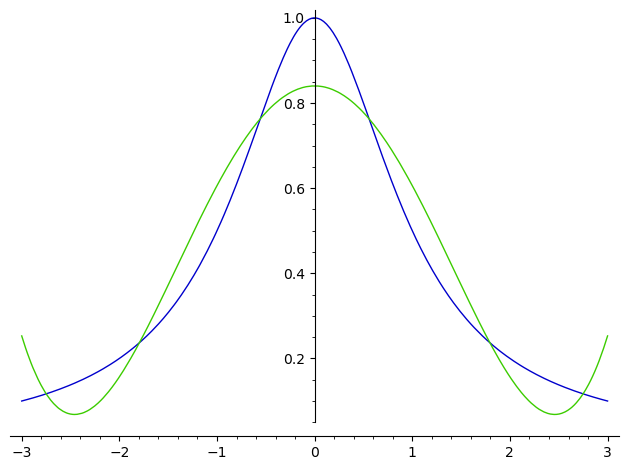

In [7]:
g(x) = ( dot(f, 1/6*sqrt(6))                              * 1/6*sqrt(6) +
         dot(f, 1/6*sqrt(2)*x)                            * 1/6*sqrt(2)*x + 
         dot(f, 5/36*sqrt(6/5)                            * (x^2 - 3))*5/36*sqrt(6/5)*(x^2 - 3) +
         dot(f, 7/324*sqrt(6/7)*(5*x^3 - 27*x))           * 7/324*sqrt(6/7)*(5*x^3 - 27*x) +
         dot(f, 1/1296*sqrt(6)*(35*x^4 - 270*x^2 + 243) ) * 1/1296*sqrt(6)*(35*x^4 - 270*x^2 + 243) )
plot([f,g],-3,3)

In [19]:
ci = [0,0,0,0,0,0] # [0]*5, [0]*(m+1)
for i in [0 .. m]:
    ci[i] = dot(f,base_ortonormal[i])
ci

[1/3*sqrt(6)*arctan(3),
 0,
 -1/18*sqrt(6)*sqrt(5)*(4*arctan(3) - 3),
 0,
 1/162*sqrt(6)*(137*arctan(3) - 150)]

In [21]:
ci = [] # [0]*5, [0]*(m+1)
for i in [0 .. m]:
    ci += [ dot(f,base[i])/dot(base[i],base[i]) ]
ci

[1/3*arctan(3), 0, -5/27*arctan(3) + 5/36, 0, 4795/34992*arctan(3) - 875/5832]

In [23]:
ci = [ dot(f,gi)/dot(gi,gi) for gi in base ]

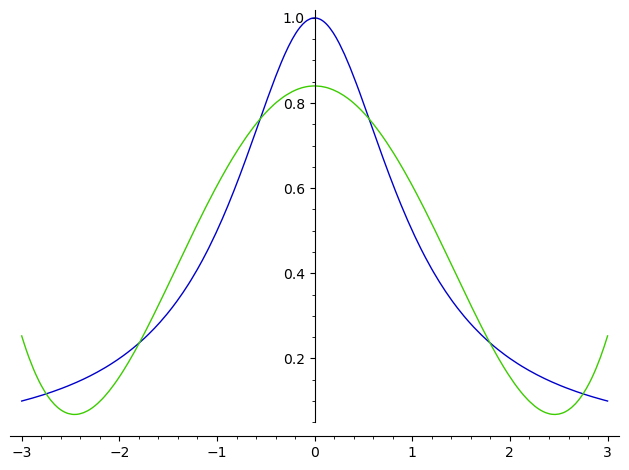

In [25]:
g(x) = vector(ci) * vector(base)
plot([f,g],-3,3)

## Ejercicio 2

In [1]:
# Producto escalar
def dot(p,q):
    return (p*q).integral(x,-3,3)
    # return numerical_integral(p*q,-3,3)[0]

In [2]:
m=10
base = [1+0*x]
base += [x - dot(x*base[0],base[0])/dot(base[0],base[0])]
for _ in range(m-1):
    ai = dot(x*base[-1],base[-1])/dot(base[-1],base[-1])
    bi = dot(x*base[-1],base[-2])/dot(base[-2],base[-2])
    base += [ ((x-ai)*base[-1] - bi*base[-2]).expand() ]

In [3]:
f(x) = 1/(1+x^2)

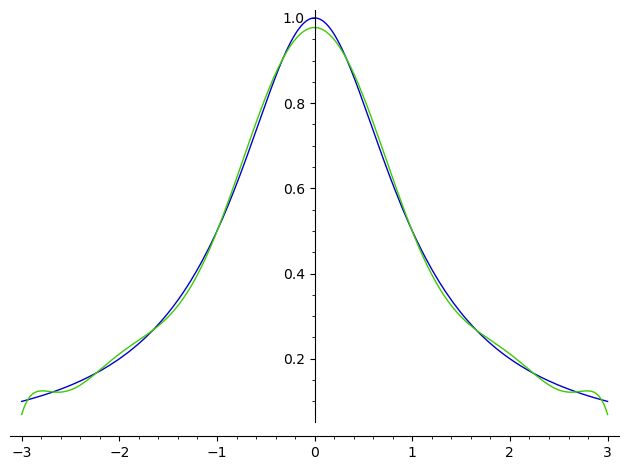

In [4]:
ci = [ dot(f,gi)/dot(gi,gi) for gi in base ]
g(x) = vector(ci) * vector(base)
plot([f,g],-3,3)

## Ejercicio 3

$$ \langle f,g_j \rangle - \sum c_i \langle g_i , g_j \rangle = 0 $$

In [22]:
base = [1+0*x,x,x^2,x^3,x^4]
g0,g1,g2,g3,g4 = base

In [24]:
A = matrix([ [dot(g0,g0), dot(g0,g1), dot(g0,g2), dot(g0,g3),dot(g0,g4)], 
             [dot(g1,g0), dot(g1,g1), dot(g1,g2), dot(g1,g3),dot(g1,g4)], 
            [dot(g2,g0), dot(g2,g1), dot(g2,g2), dot(g2,g3),dot(g2,g4)], 
            [dot(g3,g0), dot(g3,g1), dot(g3,g2), dot(g3,g3),dot(g3,g4)], 
            [dot(g4,g0), dot(g4,g1), dot(g4,g2), dot(g4,g3),dot(g4,g4)], 
           ])
A

[     6      0     18      0  486/5]
[     0     18      0  486/5      0]
[    18      0  486/5      0 4374/7]
[     0  486/5      0 4374/7      0]
[ 486/5      0 4374/7      0   4374]

In [25]:
b = vector([dot(f,gi) for gi in base])
b

(2*arctan(3), 0, -2*arctan(3) + 6, 0, 2*arctan(3) + 12)

In [26]:
ci = A\b

In [28]:
g(x) = ci*vector(base)

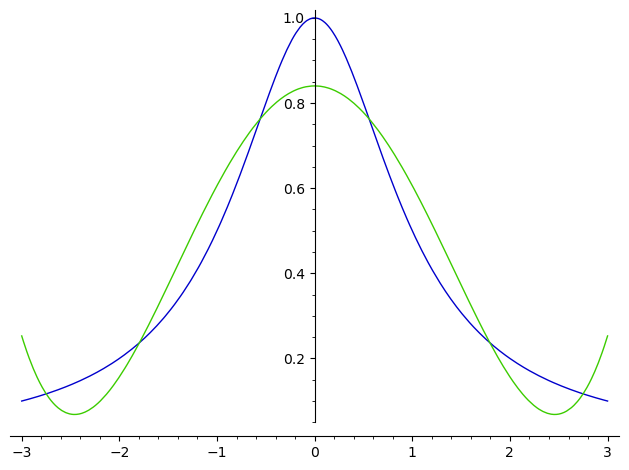

In [29]:
plot([f,g],-3,3)

<div class="alert alert-block alert-info">
<strong>Ejercicio 2. </strong>
    
Considerar ahora el producto (semi)escalar dado por 
$$
\langle f,g\rangle = \sum_{i=0}^4 f(x_i)g(x_i),
$$
donde $x_i$ son puntos equiespaciados con $x_0=-3$ y $x_4=3$. 
    
    
1. Calcular la mejor aproximación de $f$ mediante polinomios de grado menor o igual a 2 en el espacio de funciones continuas dotado con la norma anterior. 
    
2. Calcular la mejor aproximación de $f$ mediante polinomios de grado menor o igual a 4 en el espacio de funciones continuas dotado con la norma anterior. Comparar el polinomio obtenido con el polinomio interpolador en 5 puntos equiespaciados. 
</div>

In [6]:
f(x) = 1/(1+x^2)

In [7]:
# Producto escalar
def dot(p,q):
    return sum( p(x=xk)*q(x=xk) for xk in [-3, -3+6/4 .. 3])
    # return numerical_integral(p*q,-3,3)[0]

In [8]:
m=4
base = [1+0*x]
base += [x - dot(x*base[0],base[0])/dot(base[0],base[0])]
for _ in range(m-1):
    ai = dot(x*base[-1],base[-1])/dot(base[-1],base[-1])
    bi = dot(x*base[-1],base[-2])/dot(base[-2],base[-2])
    base += [ ((x-ai)*base[-1] - bi*base[-2]).expand() ]
base

[1, x, x^2 - 9/2, x^3 - 153/20*x, x^4 - 279/28*x^2 + 729/70]

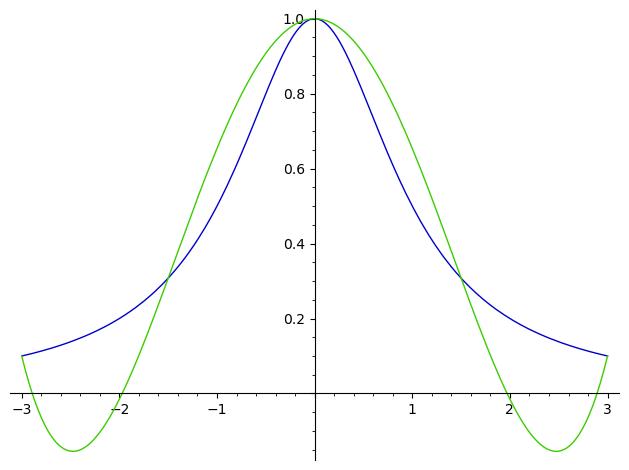

In [9]:
ci = [ dot(f,gi)/dot(gi,gi) for gi in base ]
g(x) = vector(ci) * vector(base)
plot([f,g],-3,3)

<div class="alert alert-block alert-info">
<strong>Ejercicio 3. </strong>
    
Considerar el producto escalar dado por 
$$
\langle f,g\rangle = \int_{-\pi}^\pi f(x_i)g(x_i),
$$

1. Obtener la mejor aproximación de $f(x)=x$ en el espacio generado por $1,\sin x,\cos x, \cos^2 x, \cos x \sin x$.  Dibujar la mejor aproximación entre $-4\pi$ y $4\pi$

2. Comprobar que $1,\sin x, \cos x,\sin(2x),\cos(2x)$ forman una base ortogonal. Calcular de nuevo la mejor aproximación. 


    
</div>